In this exam option you will implement key components of the original JPEG image compression algorithm. The algorithm takes advantage of the facts that:
* human vision is less sensitive to high spatial frequency (rapid) variations in brightness and color than to low spatial frequency (gradual) variations, and 
* photographs and other realistic images, when broken down into frequency components using mathematical transforms, often have lower magnitudes corresponding with high frequency components.

These suggest that we can store a digital image by:
* performing a transform to break the image down into coefficients corresponding with component frequencies,
* reducing the precision with which we represent the high frequency coefficients (or even discarding them entirely), and
* storing (only) the nonzero coefficients.

Then a visually-close approximation of the original image can be obtained by reversing the process.

While there are several choices of mathematical transforms, the discrete _cosine_ transform (a very close cousin of the fast Fourier transform), strikes the right balance between implementation simplicity, execution speed, and practical effectiveness. We saw that the fast Fourier transform converts a real signal into complex coefficients corresponding with complex exponentials of different frequencies. For many of us, complex numbers just aren't as familiar as real numbers, so the discrete cosine transform is terrific: it converts a real signal into _real_ coefficients corresponding with _cosines_ of different frequencies. 

Let's begin by seeing how the DCT works. 

1) Generate a numpy array `x` with `n = 20` evenly spaced values from `0` to `1` (excluding `1`) and print it.

In [ ]:
n = 20
# complete this
print x

Should print:
```
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95]
```

2) Calculate `y` according to the following formula:

$$ y(x) = \sqrt{\frac{2}{n}} \cos \left( k \pi \left( x + \frac{1}{2n}\right) \right)$$

and print it. (Hint: watch out for a mistake that wouldn't arise in Python 3...)

In [ ]:
k = 2
# complete this
print y

Should print:
```
[ 0.31233448  0.281761    0.2236068   0.1435644   0.04946892 -0.04946892
 -0.1435644  -0.2236068  -0.281761   -0.31233448 -0.31233448 -0.281761
 -0.2236068  -0.1435644  -0.04946892  0.04946892  0.1435644   0.2236068
  0.281761    0.31233448]
```

3) Plot $y(x)$. No need for axis labels or a title.

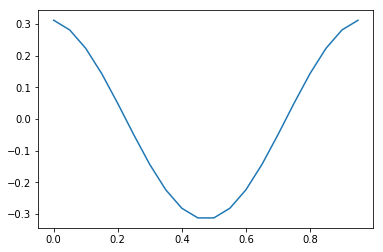

In [3]:
# complete this

Should show:
<img src="embed/img3.png">

4) Calculate the discrete cosine transform (here and _throughout_: type 2, "ortho" normalization) of $y(x)$ and store it in a variable `z`. (Refer to module documentation as necessary.) Print `z`.
</div>

In [ ]:
# complete this
print z

Should print:
```
[ -6.20633538e-17   2.20661215e-16   1.00000000e+00  -1.25843196e-16
   7.29243503e-17  -1.10742994e-16   2.87679466e-17   1.87885466e-17
  -4.95078117e-17   1.41963827e-16  -5.58570184e-17  -3.26979452e-17
   2.19977973e-17  -7.25234698e-17   8.85386356e-17  -7.87026223e-18
   5.34896127e-18   1.06662582e-16   0.00000000e+00   7.31606663e-17]
```
If your output is different, it is up to you to decide whether the difference is significant or not.

5) Write code that evaluates the truth of the following statement:

"Only one element of `z` is nonzero (numerically, that is, beyond a threshold of, say, $10^{-10}$) and the index of the nonzero value is `k` "

Please convert this statement into code carefully (e.g. if either part of the statement is false, the code should evaluate to `False`, but if both parts are true it should evaluate to `True`). Print the result.

In [ ]:
eps = 1e-10
# complete this
print only_nonzero_at_k

Should print:

`True`

If you take a careful look at what just happened, you'll see that the DCT converts signals into coefficients corresponding with cosine waves of frequency `k`. 

Now that you've done the 1D DCT, doing a 2D DCT is as simple as doing the 1D DCT twice: perform the DCT on all the columns, then perform the DCT on the resulting rows. In other words, first perform the 1D DCT on one `axis`, then perform the DCT on the other `axis`. (See documentation as necessary).

6) Write a function `dct2` that returns this 2D DCT transform of a 2D array `block`. (Hint: it's a one-liner.)

In [105]:
def dct2(block):
    pass # complete this function

7) Let's make sure the `dct2` function is working properly before we go any further. First, generate a random 10 x 10 array and refer to it with `y`. How is this any different than a 10 x 10 grayscale image? Visualize it (show it) as though it were an image here in the notebook using `imshow` from `matplotlib`. 

It will look something like the image below because by default `imshow` associates small values with deep blue (instead of black) and large values with yellow (instead of white). When comparing, keep in mind that the values are supposed to be random.

If your color palette appears to be different and/or if the colors vary smoothly rather than looking like little blocks, let me know. You might have a different version of Matplotlib.

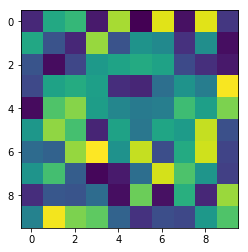

In [5]:
# do any imports as necessary
y = # complete this
plt.imshow(y)

Should show something like:
<img src="embed/img7.png">
8) Now calculate the 2D DCT of your array `y`, refer to it as `z`, and `imshow` it. 

If your `dct2` function is correct, the result should look something like the image below. The top left corner, corresponding with 0 frequency along both axes, is yellow (high value). You can think of this as representing the fact that the average value is nonzero. All the rest of the pixels are blue (low value). This illustrates the fact that the zero frequency term, which represents the average, will be much greater in magnitude than the other coefficients for positive random data.

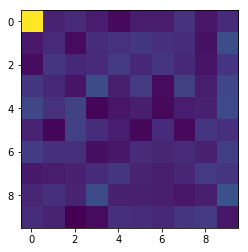

In [9]:
z = # complete this
plt.imshow(z)

Should show something like:
<img src="embed/img8.png">
9) As we start to work with real image data, we'll want to visualize in grayscale rather than these funny colors. Write a function `grayshow` that shows an array as a grayscale image in the notebook. 

In [ ]:
def grayshow(img):
    # complete this
grayshow(z)

10) Using OpenCV, load the image `kitty.bmp` as `img_color` and `imshow` it here in the notebook (in color). Now that there are three color channels, `imshow` assumes that you're trying to visualize an image.

The colors should look like they do when you open the image file in a graphics viewer - the "good" version below. The "oops" version will be a common mistake.

In [ ]:
import cv2 # use this 
img_color = # complete this
plt.imshow(# complete this)

Good:
<img src="embed/good.png">

Oops:
<img src="embed/oops.png">

In [11]:
print img_color.shape
print img_color.max()
print img_color.min()
print img_color.size

(3000, 3176, 3)
255
0
28584000


Note that its resolution is 3000px $\times$ 3176px, it has three color channels (RGB), and each pixel of each channel is a number between 0 and 255 ($2^8-1$). This jives with the fact that the picture is 

$$3000 \mbox{ rows} \cdot 3176 \frac{\mbox{px}}{\mbox{row}} \cdot 3 \frac{\mbox{channels}}{\mbox{px}}\cdot 8 \frac{\mbox{bits}}{\mbox{channel}} \cdot \frac{1}{8} \frac{\mbox{byte}}{\mbox{bit}} = \mbox{28,584,000 bytes} $$.

(You can check by right clicking the file and selecting properties. The actual file is slightly bigger because the `.bmp` format has a "header" with some additional information.)

Conversion to JPG format begins by treating the image in the <a href = "https://en.wikipedia.org/wiki/YCbCr">YCbCr colorspace</a>. Like HSV, and unlike RGB/BGR, YCbCr does not contain color information in every channel. As the human eye is even less sensitive to variations in color than to variations in light intensity, the color and intensity information should be compressed to different degrees to reduce the data required for a given apparent image quality. 

The Y channel is called the "luminance", and it's basically the grayscale (intensity) information. 

11) Convert `img_color` into the YCrCb colorspace (which is the same as  YCbCr except for the order of the channels) and refer to the result as `img_ycc`. Isolate an array view of the Y channel of `img_ycc`, refer to it as `img`, and `grayshow(img)`.

For partial credit, you can instead convert the image directly to grayscale (instead of converting to YCbCr and extracting the Y channel).

Either way, you should see essentially the same result - the cat image in grayscale.

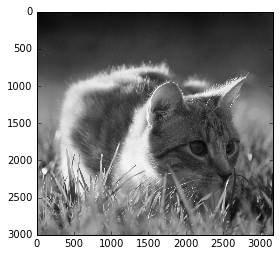

In [93]:
img_ycc = # complete code
img = # complete code
grayshow(img)

Should show:
<img src="embed/grayshow.png">

Compression of the color channels follows essentially the same process as the luminance channel (except for different numerical choices of parameters in the "Quantization" step at the end), so in the interest of time, we'll just work with the luminance channel `img`.

12) Write a function `graysave(filename, img)` that saves an array `img` as a grayscale image with the specified `filename`. Then save `img` to `kitty_gray.bmp`. 

This function is probably a one-liner. But there is more than one way to accomplish it, and some require a little more code than others. I have you write a function to do it so that you can just call the function later rather than typing it all out again. It will help us in grading, too.

You should be able to open the file in any graphics viewer (Windows preview, paint, Chrome, etc...) and it should look like a grayscale version of the original.

In [94]:
def graysave(filename, img):
    # complete this
graysave("kitty_gray.bmp", img)

JPG compression works on an image as though it were a mosaic of smaller $8\mbox{px} \times 8\mbox{px}$ images called blocks. It will be handy to have a function `get_block(img, i, j, k)` for extracting (returning) a view (not a copy) of the $k \times k$ block in the `i`$^{\mbox{th}}$ block row and `j`$^{\mbox{th}}$ block column. 

<img src="embed/A1Diagram2.png",width=500>

13) Write the function `get_block(img, i, j, k)`. Test it by extracting block `i = 187`, `j = 231` (187 block rows down from the top, 231 block columns over from the left) with `k=8`, refering to it as `block`, and printing it.

In [ ]:
def get_block(img, i, j, k):
    # complete this
block = get_block(img, 187, 231, 8)
print block

Should show:
```
[[70 70 71 71 71 72 78 86]
 [71 69 67 69 69 70 72 77]
 [72 71 69 69 69 69 71 76]
 [74 73 71 69 69 69 71 74]
 [75 74 73 71 71 71 72 74]
 [75 74 73 73 73 73 73 75]
 [74 73 71 73 73 73 74 75]
 [72 71 69 71 71 72 73 74]]
```

Note that all of the elements are similar in magnitude. The simplest compression idea would be to save only the average value of all 64, and define a file format such that graphics viewers would show that average shade of gray in an 8x8 block. This would reduce the file size by a factor of 64, but it would make the image look pixelated (blocky).

The JPEG file format saves the average and also a few important (typically low-frequency) variations from the average: it saves the important, low-frequency coefficients of the discrete cosine transform! 

14) Take the 2D DCT of the `block` and refer to this array as `dct_block`. Print the result.

In [ ]:
dct_block = # complete this
print dct_block

Should show:
```
[[  5.77250000e+02  -6.66855886e+00   1.18847503e+01  -2.93827790e+00
    4.25000000e+00  -1.36194964e+00  -5.20598597e-02  -8.16663251e-01]
 [ -3.09781287e+00  -6.50631909e+00   4.97872672e+00  -4.10277747e+00
    1.61058076e+00  -7.78314515e-01   7.49874118e-01   3.70026230e-01]
 [  1.45827651e+00  -8.96428162e+00   3.75000000e-01  -8.81906702e-01
    1.34619113e+00   5.89271219e-01  -5.51776695e-01  -7.83986444e-01]
 [  8.17854462e+00  -2.01085233e+00  -3.86497781e-01  -1.56508336e+00
   -1.68363700e-01   1.18458297e-01   5.39578523e-01   5.86989203e-01]
 [  1.00000000e+00  -9.90173886e-01   1.44186199e+00  -1.64534434e+00
   -1.00000000e+00   1.03305835e-01   2.14555359e-01   8.22633326e-01]
 [  2.97570982e+00  -1.13508624e+00   7.71529528e-01  -1.36897857e+00
   -5.02257259e-02  -1.36819604e-01  -3.24057158e-01   4.33691317e-01]
 [  1.56074649e+00  -1.04027988e+00   1.98223305e-01  -1.28126378e+00
   -1.64145242e-02  -3.67944823e-01   3.75000000e-01   2.06924534e-01]
 [  1.23899732e+00  -6.17410637e-01   6.01851277e-02  -6.66229133e-01
    1.26755807e-02  -5.46804287e-02  -7.45014021e-02   2.08222048e-01]]
```

These are the coefficients that, when applied to 2D cosine waves and summed, reproduce the original image. Let's confirm this before moving on. 

15) Write a function `idct2` that takes the 2D inverse DCT of an array and returns the result. (Writing the function is practically identical to `dct2`. You can do the inverse DCT along each axis individually as before. Remember to use "ortho" normalization.) Print the result of performing `idct2` on `dct_block`. You should get back an array with values identical to your original `block`.

In [144]:
def idct2(block):
    # complete this
print idct2(dct_block)

[[ 70.  70.  71.  71.  71.  72.  78.  86.]
 [ 71.  69.  67.  69.  69.  70.  72.  77.]
 [ 72.  71.  69.  69.  69.  69.  71.  76.]
 [ 74.  73.  71.  69.  69.  69.  71.  74.]
 [ 75.  74.  73.  71.  71.  71.  72.  74.]
 [ 75.  74.  73.  73.  73.  73.  73.  75.]
 [ 74.  73.  71.  73.  73.  73.  74.  75.]
 [ 72.  71.  69.  71.  71.  72.  73.  74.]]


16) Write a statement that tests whether _all_ of the elements of the resulting array are equal to the elements of the original `block` (numerically speaking, that is, within a small tolerance) .

In [141]:
# write the statement

True

Should print:
`True`

Note that the elements at the top left of `dct_block`, which correspond with low frequencies, are much higher in magnitude than the rest.

17) Confirm this more easily by printing `dct_block` with all terms rounded to the nearest integer.

In [135]:
# complete this

array([[ 577.,   -7.,   12.,   -3.,    4.,   -1.,    0.,   -1.],
       [  -3.,   -7.,    5.,   -4.,    2.,   -1.,    1.,    0.],
       [   1.,   -9.,    0.,   -1.,    1.,    1.,   -1.,   -1.],
       [   8.,   -2.,    0.,   -2.,    0.,    0.,    1.,    1.],
       [   1.,   -1.,    1.,   -2.,   -1.,    0.,    0.,    1.],
       [   3.,   -1.,    1.,   -1.,    0.,    0.,    0.,    0.],
       [   2.,   -1.,    0.,   -1.,    0.,    0.,    0.,    0.],
       [   1.,   -1.,    0.,   -1.,    0.,    0.,    0.,    0.]])

Should print:
```
array([[ 577.,   -7.,   12.,   -3.,    4.,   -1.,    0.,   -1.],
       [  -3.,   -7.,    5.,   -4.,    2.,   -1.,    1.,    0.],
       [   1.,   -9.,    0.,   -1.,    1.,    1.,   -1.,   -1.],
       [   8.,   -2.,    0.,   -2.,    0.,    0.,    1.,    1.],
       [   1.,   -1.,    1.,   -2.,   -1.,    0.,    0.,    1.],
       [   3.,   -1.,    1.,   -1.,    0.,    0.,    0.,    0.],
       [   2.,   -1.,    0.,   -1.,    0.,    0.,    0.,    0.],
       [   1.,   -1.,    0.,   -1.,    0.,    0.,    0.,    0.]])
```

So maybe if we zero all but the low frequency terms from the top left corner and take the inverse DCT, we'll get back a good approximation of the original image but from much less data...

18) Let $m = 4$. Zero all but the top left $m \times m$ sub-block of block and round to the nearest integer. Refer to the result as `approx_dct_block` and print it.

In [160]:
m = 4
# complete this
print approx_dct_block

[[ 577.   -7.   12.   -3.    0.    0.    0.    0.]
 [  -3.   -7.    5.   -4.    0.    0.    0.    0.]
 [   1.   -9.    0.   -1.    0.    0.    0.    0.]
 [   8.   -2.    0.   -2.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]


Should show:
```
[[ 577.   -7.   12.   -3.    0.    0.    0.    0.]
 [  -3.   -7.    5.   -4.    0.    0.    0.    0.]
 [   1.   -9.    0.   -1.    0.    0.    0.    0.]
 [   8.   -2.    0.   -2.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]
 ```

19) Take the inverse DCT of `approx_dct_block`. Print the difference between this and the original `block`, rounded to the nearest integer. All the values should be pretty small.

In [161]:
# complete this

array([[-1.,  0.,  0., -1., -1.,  1.,  0., -3.],
       [-1.,  1.,  3.,  0., -1.,  1.,  3.,  2.],
       [ 0.,  0.,  0., -1., -1.,  0.,  1., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0., -1.,  0.,  1.,  0.],
       [-1.,  0.,  1., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  1.,  0., -1.]])

Should show:
```
array([[-1.,  0.,  0., -1., -1.,  1.,  0., -3.],
       [-1.,  1.,  3.,  0., -1.,  1.,  3.,  2.],
       [ 0.,  0.,  0., -1., -1.,  0.,  1., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0., -1.,  0.,  1.,  0.],
       [-1.,  0.,  1., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  1.,  0., -1.]])
```

Compare `approx_dct_block` to `block` visually. They don't look exactly the same, but they're close enough that if you do this for every $8 \times 8$ block of an image. _Hint: be sure that these arrays consist of the appropriate data type before showing. This is something you'll need to look out for throughout the rest ofthe exam._

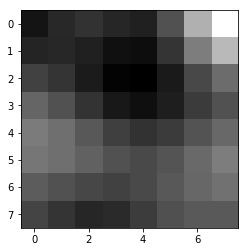

In [21]:
grayshow(idct2(approx_dct_block))

Should show:
<img src="embed/img19a.png">

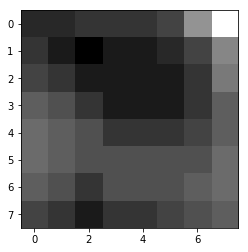

In [22]:
grayshow(block)

Should show:
<img src="embed/img19b.png">

So here's the full compression idea: save only the top left $m \times m$ sub-block of the 2D DCT of each $8 \times 8$ block (rounded to the nearest integer).  To reconstruct the image, load each $m \times m$ sub-block into the top left of an $8 \times 8$ array (assuming the remaining values are 0), take the inverse DCT, and reassemble the blocks to form the image. 

20) By what factor should this reduce the file size, in terms of $m$ (assuming that each rounded DCT coefficient can also be stored in 8-bit)?

(write mathematical expression as text)

21) Write a function `save_compressed_img` that accepts a a filename, an image array, and a parameter $m$; extracts the lowest frequency $m \times m$ coefficients from the DCT of each $8 \times 8$ block of the image (and rounds them); arranges the (rounded) $m \times m$ blocks of coefficients in a separate array, saves the results in a <a href = "https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.io.html#numpy-binary-files-npy-npz">Numpy `.npy` file</a>, and also returns the result. The format of the array is depicted below:

<img src="A1Diagram.png",width=500>

Use your function to save `kitty_compressed.npy` with $m=2$. 

Your function will not only be graded on accuracy, but also on efficiency and style. Avoid hard-coding the image dimensions; this function should work with any image that has dimensions divisible by 8 (you don't have to consider otherwise). Wherever possible, use your `get_block` function from before. Most importantly, you should pre-allocate the array to store the DCT coefficients; concatenating each $m \times m$ portion one at a time would be terribly inefficient. Use _at most_ two `for` loops for full credit (we'll think about how to do it without any `for` loops later).

In [ ]:
def save_compressed_img(filename, img, m):
    # complete this
dct_coeff = save_compressed_img("kitty_compressed.npy", img, 2)
dct_coeff[:8,:8]

Should show:
```
array([[ 114.,   -6.,  116.,    3.,  113.,   -1.,  112.,   -4.],
       [  -6.,    0.,   -4.,   -3.,    0.,    0.,    2.,   -3.],
       [ 121.,   -1.,  120.,    1.,  119.,    0.,  118.,    1.],
       [   1.,   -1.,    0.,    1.,   -1.,    0.,    0.,   -2.],
       [ 120.,    0.,  118.,    4.,  113.,   -2.,  114.,   -1.],
       [   5.,    0.,    4.,    1.,    0.,    0.,    3.,   -2.],
       [ 107.,   -3.,  111.,    2.,  113.,    1.,  112.,    4.],
       [   1.,    1.,   -3.,    3.,    3.,    0.,    2.,   -2.]])
```

22) Write a function `load_compressed_img` that accepts a filename and parameter $m$ and re-constructs the (approximate) original image array. Show the image reconstructed from `kitty_compressed.npy`, and save it to `kitty_compressed.bmp`.

For reference, see the provided `kitty_compressed_reference.bmp`, which is the image I reconstructed from only the top left $2 \times 2$ DCT coefficients of each $8 \times 8$ block of the original image. Zoom in. Notice that some of the details are missing, and you can faintly see the boundaries of the $8 \times 8$ blocks, but it's not bad coming from a small fraction of the original data! You should notice the same in your `kitty_compressed.bmp`.

You can also experiment with different values of $m$ to see how the quality is affected. For instance, setting $m = 1$ is equivalent to the original idea of storing only the average value of each $8 \times 8$ block. Zooming into the saved image, you should easily see that it is quite pixelated. Using $m = 8$, the saved image should look almost exactly like the original image, even when zoomed in as far as possible. (The DCT coefficients were rounded to the nearest integer, however, so the original image can't be reconstructed exactly.)

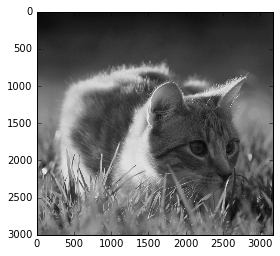

In [272]:
def load_compressed_img(filename, m):
    # complete this
img2 = load_compressed_img("kitty_compressed.npy", 2)
grayshow(img2)
graysave("kitty_compressed.bmp", img2)

23) Rewrite `dct2` and `save_compressed_img` without any `for` loops. That is, write a `dct2_no_loops` to take the 2D DCT of each $8\times8$ block of an image separately without using any `for` loops. Then use this in a new `save_compressed_img_no_loops`, which will extract the top left $m \times m$ sub-block from each $8\times8$ block (and arrange them properly) without any `for` loops. You can confirm that `save_compressed_img_no_loops` and `save_compressed_img` return the same results.

_Hint 1: this may be pretty challenging and time-consuming. It's only worth a few points, so finish everything else first._

_Hint 2 I did the DCT along the first dimension by reshaping the image as a tall strip with width $8$px and taking the DCT of the rows. Then I reshaped to the original dimensions. To take the DCT along the second dimension, I took the_ transpose _of the result, reshaped into another vertical strip, and took the DCT of the rows again. Reshape to original_ transposed _dimensions, transpose back, and you're done! Remember that reshape and transpose typically only produce different views of the underlying data so these are very efficient operations. Then rather than calling DCT thousands of times (twice on each block), we only call it twice (total), so we take advantage of the efficiency of array operations. On my machine, this takes about 1/5 the time of the double for loops._

_Hint 3: To check your work on_ `dct2_no_loops` _, use_ `get_block` _to extract blocks from the output of_ `dct2_no_loops`_. Compare to the_ `dct2` _of the corresponding blocks of_ `img`.

_Hint 4: I extracted the top left $m \times m$ DCT coefficients using a combination of Numpy's _`indices`_ function, a modulo operation, an element-wise logical operation, and fancy indexing. That's as explicit as I'll be._



In [208]:
def dct2_no_loops(img):
    # complete this

In [ ]:
def save_compressed_img_no_loops(img, m):
    pass
a = save_compressed_img_no_loops("kitty_compressed_no_loops.npy", img, 2) 
b = save_compressed_img("kitty_compressed.npy", img, 2)
# a and b should be essentially the same, but I won't tell you exactly how to compare them. 
# it's OK if a few elements are off by 1 
# This could happen if slight numerical differences in the different methods of calculating the DCTs 
#    cause the rounding to go the other way

Of course you could use similar techniques to load the compressed data, but in the interest of time, I won't ask you to do that.

Why calculate the entire $8 \times 8$ matrix of DCT coefficients if we're just going to throw out all but $m \times m$ of them? And come to think of it, since we're throwing out some information, can we find better values of the coefficients to keep than those calculated by the DCT?

24) Write a function `optimal_coefficients(block, m)` that:
* accepts an $8 \times 8$ block, and 
* returns an $m \times m$ sub-block of coefficients 

such that 

* when the image is reconstructed from these coefficients using the inverse DCT (as if they were the coefficients from the DCT),
* the $L_2$ norm of the difference (square root of the sum of the squares) between the reconstructed image and the original is minimized.

(broken into bullets to emphasize independent thoughts)

You are allowed to use `idct2` within your function to reconstruct the image, but you should _not_ use `dct2`. You want to use `minimize` to find the optimal coefficients, the coefficients that minimize the error in the reconstructed image. Perhaps these will be different from those given by the DCT. 

(You should find that these are basically the same as the corresponding DCT coefficients.)

In [ ]:
from scipy.optimize import minimize # yes, use this

def optimal_coefficients(block, m):
    # complete code

m = 3
print dct2(block)[:m,:m]
print optimal_coefficients(block, m) # should be quite similar

Should print something like:
```
[[  5.77250000e+02  -6.66855886e+00   1.18847503e+01]
 [ -3.09781287e+00  -6.50631909e+00   4.97872672e+00]
 [  1.45827651e+00  -8.96428162e+00   3.75000000e-01]]
[[  5.77249930e+02  -6.66855802e+00   1.18847182e+01]
 [ -3.09787717e+00  -6.50633321e+00   4.97870090e+00]
 [  1.45828191e+00  -8.96427656e+00   3.75012465e-01]]
```
While we have seen the most important part of the JPEG algorithm, the standard is actually a little fancier than that. Rather than keeping only the top left $m \times m$ coefficients, it keeps all the nonzero components after "quantizing", which is basically a fancy name for rounding to the nearest _multiple_ of a particular integer. 

25) "Quantize" `dct_block` by dividing element-wise by the values in the "quantization matrix" `Q` (defined below), round the results to the nearest integer, refer to the result as `quantized_block`, and print the result. 

In [ ]:
import numpy as np
Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
              [12, 12, 14, 19, 26, 28, 60, 55],
              [14, 13, 16, 24, 40, 57, 69, 56],
              [14, 17, 22, 29, 51, 87, 80, 62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113, 92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100, 103, 99]])
block = get_block(img, 187, 231, 8)
quantized_block = # complete this
print quantized_block

Should be:
```
[[36 -1  1  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
 ```
 
Note two things: 

First, the values of the quantization matrix tend to get bigger as you go down and to the right. This represents the fact that high frequency information does not need to be stored as precisely as the low frequency information. In principle then, after quantization, we can use fewer bits to represent these integers. (BTW, the values in this quantization matrix `Q` were carefully chosen by the Joint Picture Experts Group to reduce a lot of information with little perceptable effect - probably somewhat scientifically, but definitely involving some testing of human perception.)

Second, after quantization, many of the DCT values have been rounded to zero. Most of the remaining non-zero values are in the top left, justifying our selection of the top-left sub-block of DCT values before. However, we can get even better visual results without storing much more information by recording _all_ the remaining nonzero values, but _only_ the remaining nonzero values. Of course, we also need to know where these nonzero coefficients belong in the $8 \times 8$ array. This is typically done by a process called "run length encoding" in which the array is traversed in a particular order, the nonzero values are stored as the come, and when a sequence of zeros is encountered, the number of consecutive zeros is stored rather than storing each zero independently. The choice in which the array is traversed will affect the "run length" of zeros, and so we want to pick an order that will typically yield long runs of zeros to minimize the amount of information that needs to be stored. The order chosen by the Joint Picture Experts Group is a "serpentine" pattern starting at the top left and winding its way along anti-diagonals until it reaches the bottom right. In essence, this starts with the lower frequency components (which are more likely to be nonzero) and ends with the higher frequency components (many of which will be zero). 

There are many other details specified in and variations allowed by the original JPEG standard, but these are the most important ideas. (In 2000 the standard was revised, and the DCT was replaced with "wavelet decomposition" to improve quality at higher compression ratios, avoid the appearance of blocks in the reconstructed image, provide for the reconstruction of the image at more than one resolution, and correct other shortcomings.) I hope you've enjoyed learning a bit about image compression while demonstrating your ability to use Numpy, Scipy, and OpenCV.

When you're done, save this notebook (`Part IA.ipynb`) and submit to CCLE → Final Exam → Part IA.